# 1. BUSINESS UNDERSTANDING
Tahapan business understanding merupakan awal dari sebuah proyek data analytics. Tahapan ini akan dapat menghasilkan perencanaan sebuah proyek data analytics yang jelas tujuannya dengan pemahaman proses bisnis yang komprehensif.

rumah adalah bangunan yang berfungsi sebagai tempat tinggal atau hunian dan sarana pembinaan keluarga. Menurut John F.C Turner, 1972, dalam bukunya Freedom To Build mengatakan, “Rumah adalah bagian yang utuh dari permukiman, dan bukan hasil fisik sekali jadi semata, melainkan merupakan suatu proses yang terus berkembang dan terkait dengan mobilitas sosial ekonomi penghuninya dalam suatu kurun waktu.rumah adalah bangunan yang berfungsi sebagai tempat tinggal atau hunian dan sarana pembinaan keluarga. Jadi, selain berfungsi sebagai tempat tinggal atau hunian yang digunakan untuk berlindung dari gangguan iklim dan makhluk hidup lainnya, rumah merupakan tempat awal pengembangan kehidupan.Ada beberapa aspek yang harus diperahtikan dalam membeli rumah tentunya agar harga rumah tersebut dapat disesuaikan dengan budget kita. melalui beberapa data kita dapat mengetahui estimasi rumah yang ingin kita beli dengan menginput spesfikasi rumah. 
Disini saya bertujuan untuk membuat model estimasi harga rumah yang berada perumahan Miami menggunakan data yang saya ambil dari situs kaggle.

Adapun Datasetnya saya ambil dari : https://www.kaggle.com/datasets/deepcontractor/miami-housing-dataset yang berjudul 
Miami Housing Dataset karya Deep Contractor yang kemudian saya jabarkan lagi dan di olah agar menghasilkan estimasi yang saya inginkan.

# 2. DATA UNDERSTANDING
Data understanding Secara garis besar, data understanding dipakai untuk memeriksa data sehingga dapat mengidentifikasi masalah pada data yang kita dapatkan. Tahapan ini memberikan pondasi analitik untuk sebuah penelitian dengan membuat ringkasan (summary) dan mengidentifikasi potensi masalah dalam data.

Varibel dari dataset ini yaitu ada:

PARCELNO: Nomer Rumah

SALE_PRC: harga jual ($)

LND_SQFOOT: luas tanah (kaki persegi)

TOT_LVG_AREA: luas lantai (kaki persegi)

SPEC_FEAT_VAL: nilai fitur khusus (misalnya, kolam renang) ($)

RAIL_DIST: jarak ke jalur rel terdekat (indikator kebisingan) (kaki)

OCEAN_DIST: jarak ke laut (kaki)

WATER_DIST: jarak ke badan air terdekat (kaki)

CNTR_DIST: jarak ke distrik pusat bisnis Miami (kaki)

SUBCNTR_DI: jarak ke subpusat terdekat (kaki)

HWY_DIST: jarak ke jalan raya terdekat (indikator kebisingan) (kaki)

umur: umur struktur

avno60plus: variabel tiruan untuk kebisingan pesawat yang melebihi tingkat yang dapat diterima

structure_quality: kualitas struktur

month_sold: bulan penjualan 

LATITUDE: GARIS LINTANG

LONGITUDE: GARIS BUJUR



# Deskripsi Library Yang Digunakan

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Memanggil Dataset

In [9]:
df = pd.read_csv('miami-housing.csv')

# Deskripsi Dataset

In [10]:
df.head()

,LATITUDE,LONGITUDE,PARCELNO,SALE_PRC,LND_SQFOOT,TOT_LVG_AREA,SPEC_FEAT_VAL,RAIL_DIST,OCEAN_DIST,WATER_DIST,CNTR_DIST,SUBCNTR_DI,HWY_DIST,age,avno60plus,month_sold,structure_quality
0,25.891031,-80.160561,622280070620,440000.0,9375,1753,0,2815.9,12811.4,347.6,42815.3,37742.2,15954.9,67,0,8,4
1,25.891324,-80.153968,622280100460,349000.0,9375,1715,0,4359.1,10648.4,337.8,43504.9,37340.5,18125.0,63,0,9,4
2,25.891334,-80.153740,622280100470,800000.0,9375,2276,49206,4412.9,10574.1,297.1,43530.4,37328.7,18200.5,61,0,2,4
3,25.891765,-80.152657,622280100530,988000.0,12450,2058,10033,4585.0,10156.5,0.0,43797.5,37423.2,18514.4,63,0,9,4
4,25.891825,-80.154639,622280100200,755000.0,12800,1684,16681,4063.4,10836.8,326.6,43599.7,37550.8,17903.4,42,0,7,4


# 3. DATA PREPARATION
Data Preparation Secara garis besar, data preparation di kalangan data mining dipakai untuk memperbaiki masalah dalam data, kemudian membuat variabel turunan. Tahap data preparation sangat jelas untuk membutuhkan pemikiran yang cukup matang dan usaha yang cukup tinggi untuk memastikan data tepat sesuai dengan algoritma yang dipakai.

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13932 entries, 0 to 13931
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   LATITUDE           13932 non-null  float64
 1   LONGITUDE          13932 non-null  float64
 2   PARCELNO           13932 non-null  int64  
 3   SALE_PRC           13932 non-null  float64
 4   LND_SQFOOT         13932 non-null  int64  
 5   TOT_LVG_AREA       13932 non-null  int64  
 6   SPEC_FEAT_VAL      13932 non-null  int64  
 7   RAIL_DIST          13932 non-null  float64
 8   OCEAN_DIST         13932 non-null  float64
 9   WATER_DIST         13932 non-null  float64
 10  CNTR_DIST          13932 non-null  float64
 11  SUBCNTR_DI         13932 non-null  float64
 12  HWY_DIST           13932 non-null  float64
 13  age                13932 non-null  int64  
 14  avno60plus         13932 non-null  int64  
 15  month_sold         13932 non-null  int64  
 16  structure_quality  139

<Axes: >

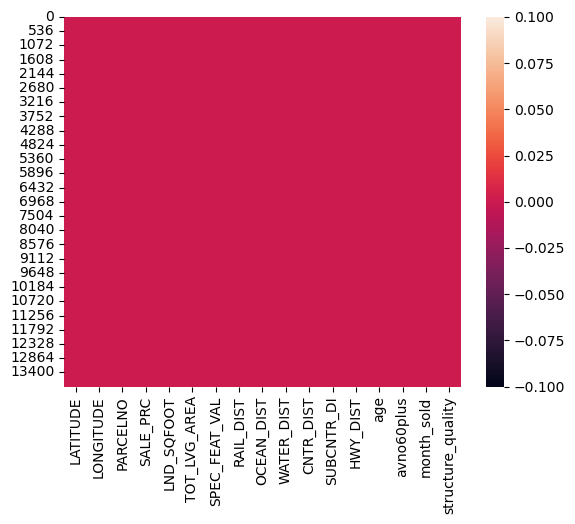

In [12]:
sns.heatmap(df.isnull())

In [13]:
df.describe()

,LATITUDE,LONGITUDE,PARCELNO,SALE_PRC,LND_SQFOOT,TOT_LVG_AREA,SPEC_FEAT_VAL,RAIL_DIST,OCEAN_DIST,WATER_DIST,CNTR_DIST,SUBCNTR_DI,HWY_DIST,age,avno60plus,month_sold,structure_quality
count,13932.000000,13932.000000,1.393200e+04,1.393200e+04,13932.000000,13932.000000,13932.000000,13932.000000,13932.000000,13932.000000,13932.000000,13932.000000,13932.000000,13932.000000,13932.000000,13932.000000,13932.000000
mean,25.728811,-80.327475,2.356496e+12,3.999419e+05,8620.879917,2058.044574,9562.493468,8348.548715,31690.993798,11960.285235,68490.327132,41115.047265,7723.770693,30.669251,0.014930,6.655828,3.513997
std,0.140633,0.089199,1.199290e+12,3.172147e+05,6070.088742,813.538535,13890.967782,6178.027333,17595.079468,11932.992369,32008.474808,22161.825935,6068.936108,21.153068,0.121276,3.301523,1.097444
min,25.434333,-80.542172,1.020008e+11,7.200000e+04,1248.000000,854.000000,0.000000,10.500000,236.100000,0.000000,3825.600000,1462.800000,90.200000,0.000000,0.000000,1.000000,1.000000
25%,25.620056,-80.403278,1.079160e+12,2.350000e+05,5400.000000,1470.000000,810.000000,3299.450000,18079.350000,2675.850000,42823.100000,23996.250000,2998.125000,14.000000,0.000000,4.000000,2.000000
50%,25.731810,-80.338911,3.040300e+12,3.100000e+05,7500.000000,1877.500000,2765.500000,7106.300000,28541.750000,6922.600000,65852.400000,41109.900000,6159.750000,26.000000,0.000000,7.000000,4.000000
75%,25.852269,-80.258019,3.060170e+12,4.280000e+05,9126.250000,2471.000000,12352.250000,12102.600000,44310.650000,19200.000000,89358.325000,53949.375000,10854.200000,46.000000,0.000000,9.000000,4.000000
max,25.974382,-80.119746,3.660170e+12,2.650000e+06,57064.000000,6287.000000,175020.000000,29621.500000,75744.900000,50399.800000,159976.500000,110553.800000,48167.300000,96.000000,1.000000,12.000000,5.000000


# Visualisasi Data

<Axes: >

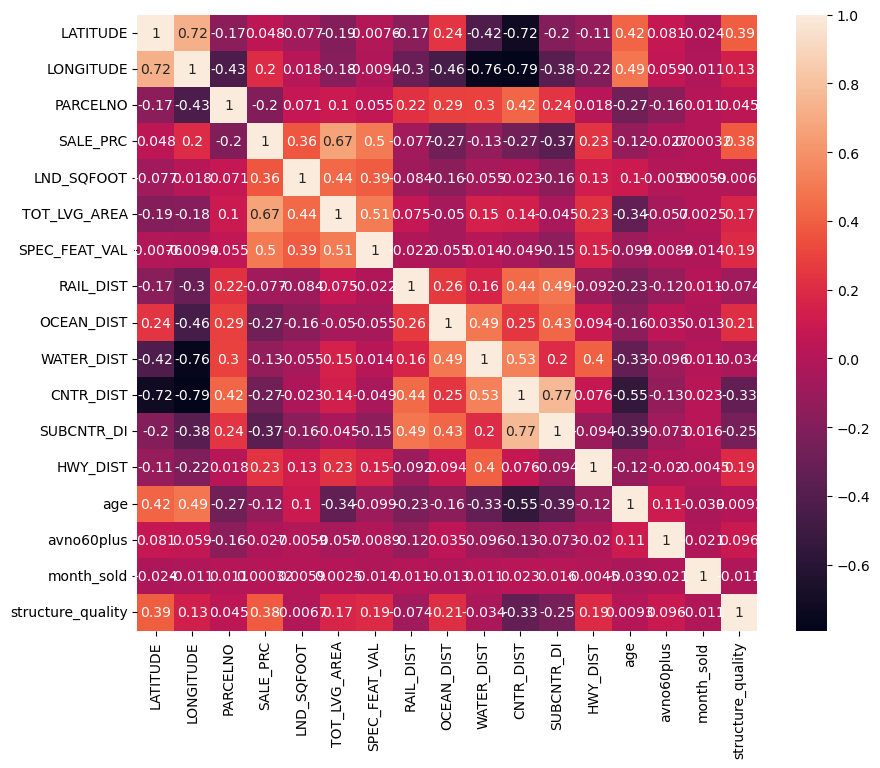

In [14]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True)

# Jumlah Rumah Berdasarkan PARCELNO = Nomer Rumah

In [17]:
PARCELNO = df.groupby('PARCELNO').count()[['LND_SQFOOT']].sort_values(by='LND_SQFOOT',ascending=True).reset_index()
PARCELNO = PARCELNO.rename(columns={'LND_SQFOOT':'House_Parcelno'})

(array([    0,     1,     2, ..., 13773, 13774, 13775]),
 [Text(0, 0, '102000801020'),
  Text(1, 0, '102010001090'),
  Text(2, 0, '131120000340'),
  Text(3, 0, '131120080400'),
  Text(4, 0, '131120080620'),
  Text(5, 0, '131120120090'),
  Text(6, 0, '131120480361'),
  Text(7, 0, '131120680040'),
  Text(8, 0, '131130060490'),
  Text(9, 0, '131130090710'),
  Text(10, 0, '131130140110'),
  Text(11, 0, '131130150171'),
  Text(12, 0, '131130150310'),
  Text(13, 0, '131130170390'),
  Text(14, 0, '131130230220'),
  Text(15, 0, '131130230330'),
  Text(16, 0, '131130230490'),
  Text(17, 0, '131130230560'),
  Text(18, 0, '131130240310'),
  Text(19, 0, '131130241570'),
  Text(20, 0, '131130242210'),
  Text(21, 0, '131130300210'),
  Text(22, 0, '131130300770'),
  Text(23, 0, '131130310040'),
  Text(24, 0, '131130380160'),
  Text(25, 0, '131130420740'),
  Text(26, 0, '131130421240'),
  Text(27, 0, '131130422250'),
  Text(28, 0, '131130510220'),
  Text(29, 0, '131130510400'),
  Text(30, 0, '13113052

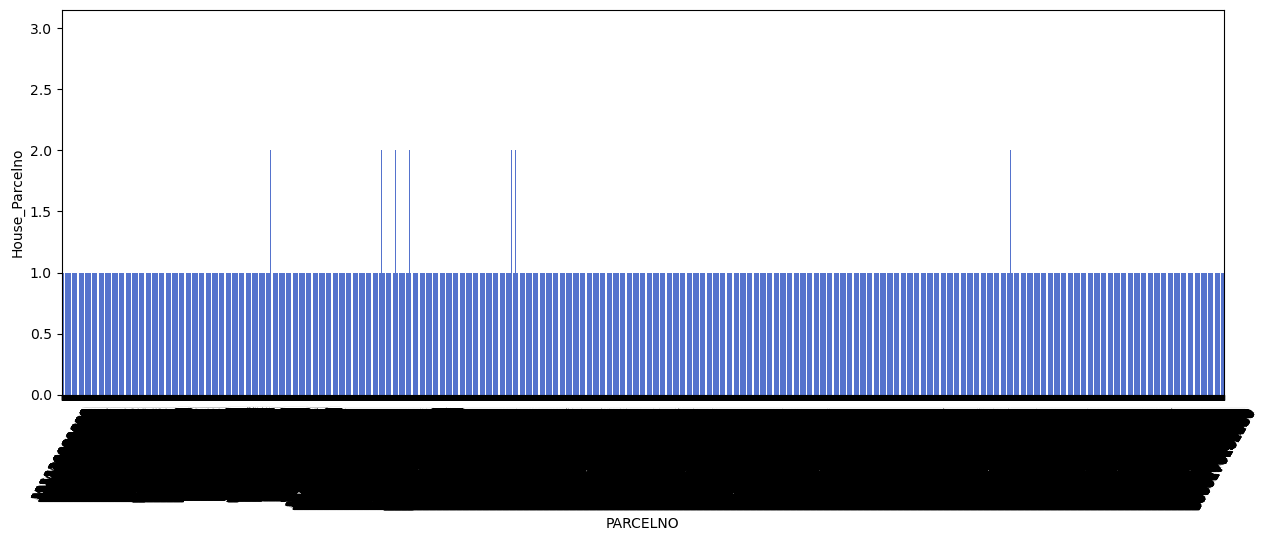

In [18]:
fig = plt.figure(figsize=(15,5))
sns.barplot(x=PARCELNO['PARCELNO'], y=PARCELNO['House_Parcelno'], color='royalblue')
plt.xticks(rotation=60)

# Jumlah Rumah Berdasarkan LATITUDE = Garis Lintang

In [19]:
LATITUDE = df.groupby('LATITUDE').count()[['LND_SQFOOT']].sort_values(by='LND_SQFOOT').reset_index()
LATITUDE = LATITUDE.rename(columns={'LND_SQFOOT':'House_Latitude'})

<Axes: xlabel='LATITUDE', ylabel='House_Latitude'>

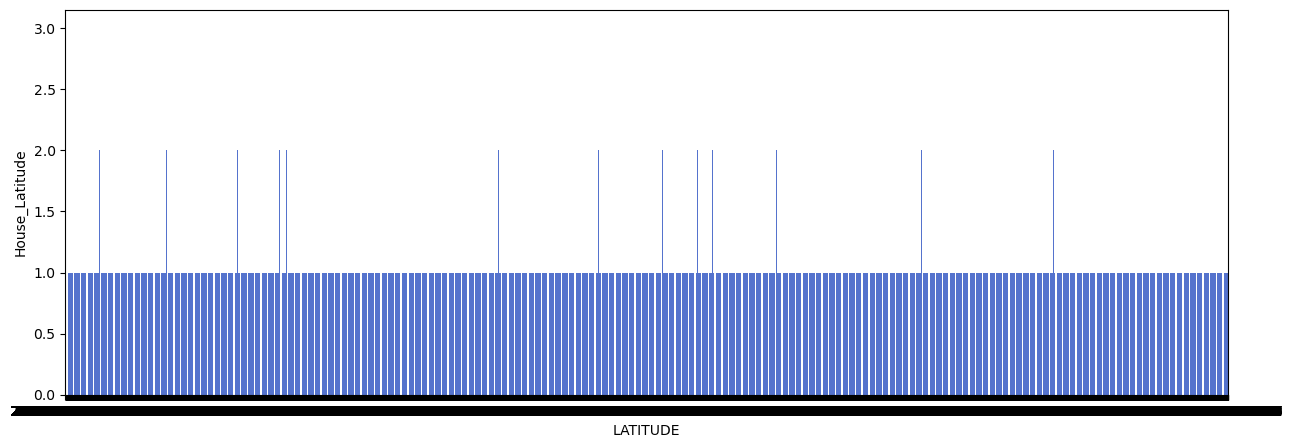

In [20]:
plt.figure(figsize=(15,5))
sns.barplot(x=LATITUDE['LATITUDE'], y=LATITUDE['House_Latitude'], color='royalblue')

# Jumlah Rumah Berdasarkan LONGITUDE = Garis Bujur

In [21]:
LONGITUDE = df.groupby('LONGITUDE').count()[['LND_SQFOOT']].sort_values(by='LND_SQFOOT').reset_index()
LONGITUDE = LONGITUDE.rename(columns={'LND_SQFOOT':'House_Longtitude'})

<Axes: xlabel='LONGITUDE', ylabel='House_Longtitude'>

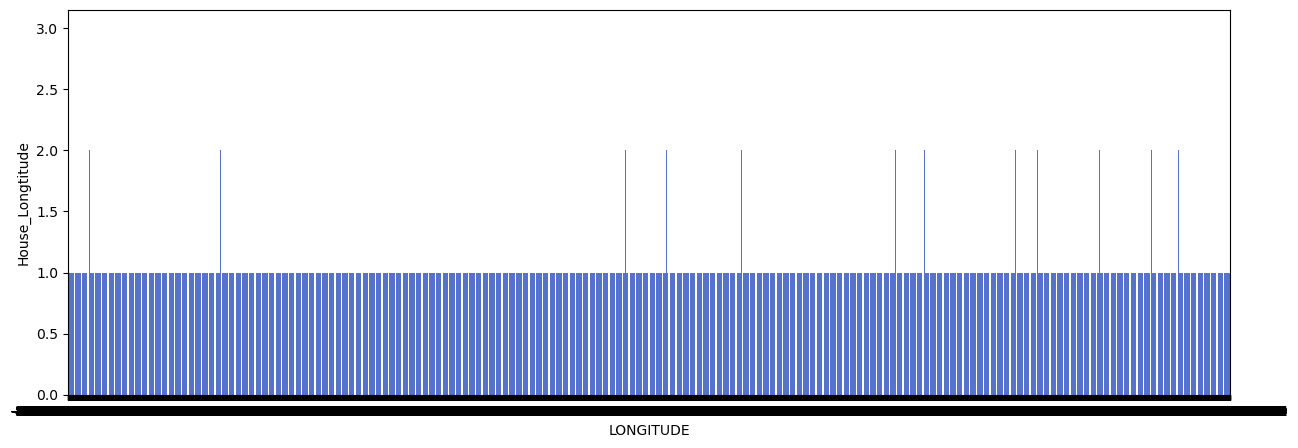

In [23]:
plt.figure(figsize=(15,5))
sns.barplot(x=LONGITUDE['LONGITUDE'], y=LONGITUDE['House_Longtitude'], color='royalblue')

# Distribusi Harga

C:\Users\USER\AppData\Local\Temp\ipykernel_12896\154046676.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['SALE_PRC'])


<Axes: xlabel='SALE_PRC', ylabel='Density'>

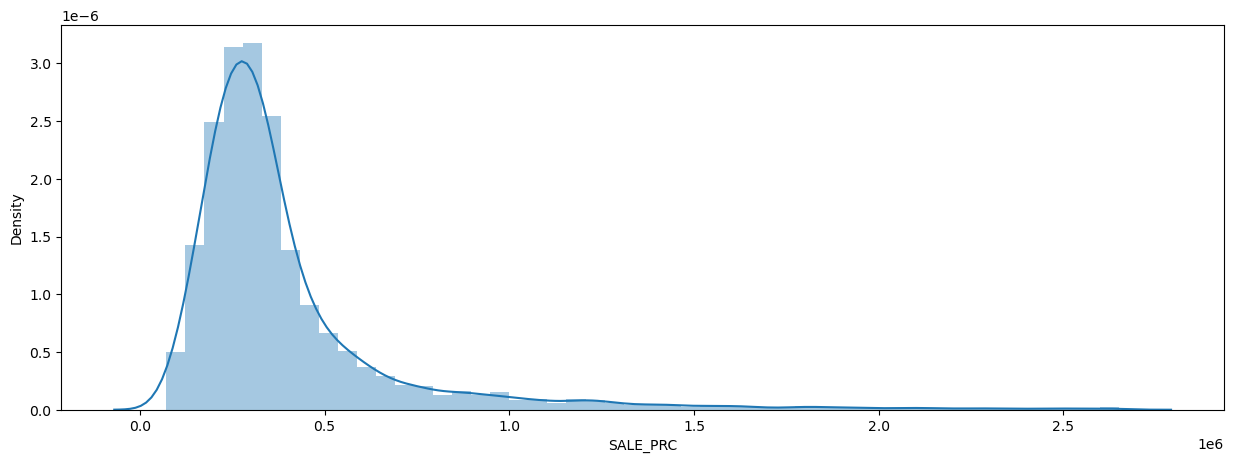

In [24]:
plt.figure(figsize=(15,5))
sns.distplot(df['SALE_PRC'])

# 4. MODELLING DATA
Tahap keempat yaitu Modelling. Secara garis besar untuk membuat model prediktif atau deskriptif. Pada tahap ini dilakukan metode statistika dan Machine Learning untuk penentuan terhadap teknik data mining, alat bantu data mining, dan algoritma data mining yang akan diterapkan.

# Seleksi Fitur

In [37]:
features = ['LATITUDE', 'LONGITUDE', 'PARCELNO', 'LND_SQFOOT', 'TOT_LVG_AREA', 'SPEC_FEAT_VAL', 'RAIL_DIST', 'OCEAN_DIST', 'WATER_DIST', 'CNTR_DIST', 'SUBCNTR_DI', 'HWY_DIST', 'age', 'month_sold', 'structure_quality']
x = df[features]
y = df['SALE_PRC']
x.shape, y.shape

((13932, 15), (13932,))

# Spill Data Training dan Data Testing

In [38]:
from sklearn.model_selection import train_test_split
x_train, X_test, y_train, y_test = train_test_split(x,y,random_state=70)
y_test.shape

(3483,)

# 5. EVALUATION DATA
Tahap kelima yaitu Evaluation. Setelah didapatkan sebuah atau beberapa model sehingga dilakukan penilaian terkait kualitas dan efektifitas-nya. 



# Membuat Model Regresi Linier

In [39]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)
pred = lr.predict(X_test)

In [40]:
score = lr.score(X_test, y_test)
print('akurasi model regresi linier = ', score)

akurasi model regresi linier =  0.7030253718160168


# 6. DEPLOYMENT
Tahap terakhir dalam model adalah Deployment. Perencanaan untuk Deployment dimulai selama Business Understanding dan harus menggabungkan tidak hanya bagaimana untuk menghasilkan nilai model, tetapi juga bagaimana mengkonversi skor keputusan, dan bagaimana untuk menggabungkan keputusan dalam sistem operasional.

# Membuat Inputan Model Regresi Linier

In [45]:
#LATITUDE, LONGITUDE, PARCELNO, LND_SQFOOT, TOT_LVG_AREA, SPEC_FEAT_VAL, RAIL_DIST, OCEAN_DIST, WATER_DIST, CNTR_DIST, SUBCNTR_DI, HWY_DIST, age, month_sold, structure_quality
input_data = np.array([[25.891825, -80.154639, 622280100200, 12800, 1684, 16681, 4063.4, 10836.8, 326.6, 43599.7, 37550.8, 17903.4, 42, 7, 4]])

prediction = lr.predict(input_data)
print('Jadi Estimasi Harga Rumah Yaitu :', prediction,'USD')

Jadi Estimasi Harga Rumah Yaitu : [626710.84685323] USD


c:\Users\USER\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


# Save Model

In [46]:
import pickle

filename = 'estimasi_rumah.sav'
pickle.dump(lr,open(filename,'wb'))